# Weight Initializers in Deep Learning

When training deep learning models, the initialization of weights can significantly affect the convergence and overall performance of the model. Different weight initializers help prevent problems like vanishing/exploding gradients and can enhance learning. Here, we discuss some of the most commonly used initializers:

## 1. **Random Normal Initialization**

In this method, the weights are initialized from a normal (Gaussian) distribution with a specified mean and standard deviation. This approach may work in some cases but often leads to the vanishing/exploding gradient problem when used with deep networks.

**Formula**:
$$
W \sim \mathcal{N}(\mu, \sigma^2)
$$
Where:
- $ \mu $ is the mean (often 0)
- $ \sigma^2 $ is the variance (standard deviation squared)

**Keras Example**:
```python
from keras.initializers import RandomNormal
initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None)


## 2. **Glorot Normal (Xavier Normal) Initialization**

Glorot Normal (also known as Xavier Normal) initialization is designed to keep the variance of the gradients consistent across layers. Weights are initialized from a normal distribution with a mean of 0 and a specific variance.

**Formula**:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{in} + n_{out}}\right)
$$

Where:
- $n_{in}$ is the number of input units in the layer
- $n_{out}$ is the number of output units in the layer

**Keras Example**:
```python
from keras.initializers import GlorotNormal
initializer = GlorotNormal()


## 3. **He Normal Initialization**

He Normal initialization is particularly well-suited for layers using the ReLU activation function. It initializes weights from a normal distribution with a mean of 0 and variance dependent on the number of input units.

**Formula**:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{in}}\right)
$$

Where:
- $n_{in}$ is the number of input units in the layer

**Keras Example**:
```python
from keras.initializers import HeNormal
initializer = HeNormal()


## Lecun Normal Initialization

Lecun Normal initialization is suitable for layers with the `tanh` activation function. It is similar to He Normal, but with a smaller variance.

**Formula**:

$$
W \sim \mathcal{N}\left(0, \frac{1}{n_{in}}\right)
$$

Where:
- $n_{in}$ is the number of input units in the layer

**Keras Example**:
```python
from keras.initializers import LecunNormal
initializer = LecunNormal()


## Weight Initializers and When to Use Them

| **Initializer**        | **When to Use**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **Random Normal**       | Use in simple cases, but can lead to vanishing/exploding gradients in deep networks. |
| **Glorot Normal**       | Best used with `sigmoid` or `tanh` activation functions; helps maintain gradient consistency across layers. |
| **He Normal**           | Optimized for ReLU and variants (e.g., Leaky ReLU); helps prevent vanishing gradients. |
| **Lecun Normal**        | Use with the `tanh` activation function; provides better convergence.           |
| **Glorot Uniform**      | An alternative to Glorot Normal, especially effective for `sigmoid` or `tanh` activations. |
| **Random Uniform**      | Useful for exploratory modeling but may not perform well in deeper networks.     |



# Steps to solve Emergency vs Non-Emergency vehicle classification

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol><ol>Setting up the weight initialization technique</ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [3]:
# defining the seed value
seed = 42

In [4]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [6]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [7]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [8]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [9]:
# normalizing the pixel values
X = X / X.max()

In [10]:

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [12]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### Setting up the weight initialization technique

In [13]:
# importing different initialization techniques
from keras.initializers import random_normal, glorot_normal, he_normal

In [14]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))

## 5. Compiling the model

In [15]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [16]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [17]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 460ms/step - accuracy: 0.5236 - loss: 0.7023 - val_accuracy: 0.6473 - val_loss: 0.6613
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.6361 - loss: 0.6536 - val_accuracy: 0.6246 - val_loss: 0.6413
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.6605 - loss: 0.6258 - val_accuracy: 0.6190 - val_loss: 0.6447
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.6441 - loss: 0.6280 - val_accuracy: 0.6728 - val_loss: 0.6099
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.6686 - loss: 0.6144 - val_accuracy: 0.6926 - val_loss: 0.6036
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.6871 - loss: 0.6041 - val_accuracy: 0.6926 - val_loss: 0.5957
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.6825 - loss: 0.5925 - val_accuracy: 0.6912 - val_loss: 0.5912
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.7156 - loss: 0.5847 - val_accuracy: 0

## 8. Evaluating model performance

In [18]:
y_pred = model.predict(X_valid)
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [19]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.7082152974504249 %


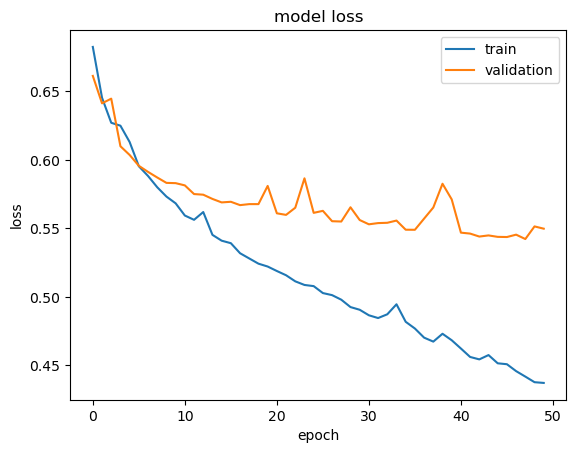

In [20]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import Adam
from keras.initializers import random_normal, glorot_normal, he_normal
from sklearn.model_selection import train_test_split

# Assuming data is already loaded into X and y
# Example data split, you can replace it with actual data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the seed for reproducibility
seed = 42

# Function to create a model with a specified initializer
def create_model(initializer):
    model = Sequential()
    model.add(InputLayer(shape=(224*224*3,)))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=initializer(seed=seed)))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=initializer(seed=seed)))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer=initializer(seed=seed)))
    
    # Defining the Adam optimizer and setting the learning rate as 10^-5
    adam = Adam(learning_rate=1e-5)
    
    # Compiling the model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

# Train and evaluate models with different initializers
initializers = {
    'random_normal': random_normal,
    'glorot_normal': glorot_normal,
    'he_normal': he_normal
}

histories = {}

for name, initializer in initializers.items():
    print(f"\nTraining with {name} initializer...")
    model = create_model(initializer)
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid), verbose=0)
    histories[name] = history

# Plotting the training and validation accuracy/loss curves for all initializers
plt.figure(figsize=(14, 12))

for idx, key in enumerate(histories):
    history = histories[key].history
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_loss = history['loss']
    val_loss = history['val_loss']

    # Plotting training and validation accuracy
    plt.subplot(3, 2, idx * 2 + 1)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy ({key})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(3, 2, idx * 2 + 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Training and Validation Loss ({key})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Reporting the best results for each initializer based on validation accuracy
for name, history in histories.items():
    val_acc = history.history['val_accuracy']
    best_epoch = val_acc.index(max(val_acc)) + 1
    best_val_acc = max(val_acc)
    best_val_loss = history.history['val_loss'][best_epoch - 1]
    print(f"Best Epoch for {name}: {best_epoch}, Validation Accuracy: {best_val_acc:.4f}, Validation Loss: {best_val_loss:.4f}")



Training with random_normal initializer...

Training with glorot_normal initializer...


# Activation Functions

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import Adam
from keras.initializers import he_normal
from sklearn.model_selection import train_test_split

# Assuming data is already loaded into X and y
# Example data split, you can replace it with actual data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the seed for reproducibility
seed = 42

# Function to create a model with a specified activation function
def create_model(activation_function):
    model = Sequential()
    model.add(InputLayer(shape=(224*224*3,)))
    model.add(Dense(100, activation=activation_function, kernel_initializer=he_normal(seed=seed)))
    model.add(Dense(100, activation=activation_function, kernel_initializer=he_normal(seed=seed)))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))  # Output layer uses sigmoid for binary classification
    
    # Defining the Adam optimizer and setting the learning rate as 10^-5
    adam = Adam(learning_rate=1e-5)
    
    # Compiling the model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

# Train and evaluate models with different activation functions
activation_functions = ['sigmoid', 'relu', 'tanh', 'elu']  # Define the list of activation functions you want to test

histories = {}

for activation_function in activation_functions:
    print(f"\nTraining with {activation_function} activation function...")
    model = create_model(activation_function)
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid), verbose=0)
    histories[activation_function] = history

# Plotting the training and validation accuracy/loss curves for all activation functions
plt.figure(figsize=(14, 12))

for idx, key in enumerate(histories):
    history = histories[key].history
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_loss = history['loss']
    val_loss = history['val_loss']

    # Plotting training and validation accuracy
    plt.subplot(4, 2, idx * 2 + 1)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy ({key} activation)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(4, 2, idx * 2 + 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Training and Validation Loss ({key} activation)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Reporting the best results for each activation function based on validation accuracy
for name, history in histories.items():
    val_acc = history.history['val_accuracy']
    best_epoch = val_acc.index(max(val_acc)) + 1
    best_val_acc = max(val_acc)
    best_val_loss = history.history['val_loss'][best_epoch - 1]
    print(f"Best Epoch for {name} activation: {best_epoch}, Validation Accuracy: {best_val_acc:.4f}, Validation Loss: {best_val_loss:.4f}")
